In [1]:
from zipfile import ZipFile


In [2]:
data_dir = "/content/drive/MyDrive/Data Sets/origin1.zip"
labels = "/content/drive/MyDrive/Data Sets/origin1_labels.zip"

In [3]:
# with ZipFile(data_dir,"r") as data:
#     data.extractall("/content/drive/MyDrive/Data Sets/Data")

In [4]:
# with ZipFile(labels,"r") as data:
#     data.extractall("/content/drive/MyDrive/Data Sets/Data")

In [5]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imghdr


In [6]:
columns = ["image_name","face_id_in_image","face_box_top","face_box_left","face_box_right","face_box_bottom","face_box_cofidence","expression_label"]

In [7]:
labels_df = pd.read_csv(labels ,sep=" ",header=None)
labels_df.columns = columns

In [8]:
labels_df

image_name  face_id_in_image  face_box_top  \
0                angry_actor_104.jpg                 0            28   
1                angry_actor_109.jpg                 0            31   
2                angry_actor_120.jpg                 1            53   
3                 angry_actor_13.jpg                 0            77   
4                angry_actor_132.jpg                 0            95   
...                              ...               ...           ...   
91782  expressionless_infant_699.jpg                 1           164   
91783           afraid_woman_204.jpg                 0            20   
91784             afraid_girl_13.jpg                 0             0   
91785   surprised_expression_629.jpg                 0             8   
91786   surprised_expression_409.jpg                 0            80   

       face_box_left  face_box_right  face_box_bottom  face_box_cofidence  \
0                113             226              141             22.9362   
1                157             345              219             50.3056   
2                 53             372              372             13.9434   
3                 51             362              388             85.8104   
4                 31             412              476             82.3948   
...              ...             ...              ...                 ...   
91782            169             236              231             56.7565   
91783             13              93              100             74.5950   
91784            210             525              315             33.7428   
91785             89             186              105             44.0914   
91786             46             184              218             63.8069   

       expression_label  
0                     0  
1                     0  
2                     2  
3                     3  
4                     0  
...                 ...  
91782                 0  
91783                 6  
91784                 4  
91785                 5  
91786                 5  

[91787 rows x 8 columns]

In [9]:
images = "/content/drive/MyDrive/Data Sets/Data/origin1"

In [10]:
img = cv2.imread(os.path.join(images,"surprised_expression_86.jpg"))

In [11]:
from google.colab.patches import cv2_imshow

In [12]:
print(img)

[[[189 194 203]
  [189 194 203]
  [189 194 203]
  ...
  [216 218 228]
  [216 218 228]
  [216 218 228]]

 [[189 194 203]
  [189 194 203]
  [189 194 203]
  ...
  [216 218 228]
  [216 218 228]
  [216 218 228]]

 [[189 194 203]
  [189 194 203]
  [189 194 203]
  ...
  [216 218 228]
  [216 218 228]
  [216 218 228]]

 ...

 [[124 122 198]
  [123 121 197]
  [122 120 196]
  ...
  [161 160 226]
  [153 152 218]
  [152 151 217]]

 [[125 123 199]
  [123 121 197]
  [122 120 196]
  ...
  [160 159 225]
  [170 169 235]
  [146 145 211]]

 [[126 124 200]
  [124 122 198]
  [122 120 196]
  ...
  [154 153 219]
  [142 141 207]
  [150 149 215]]]


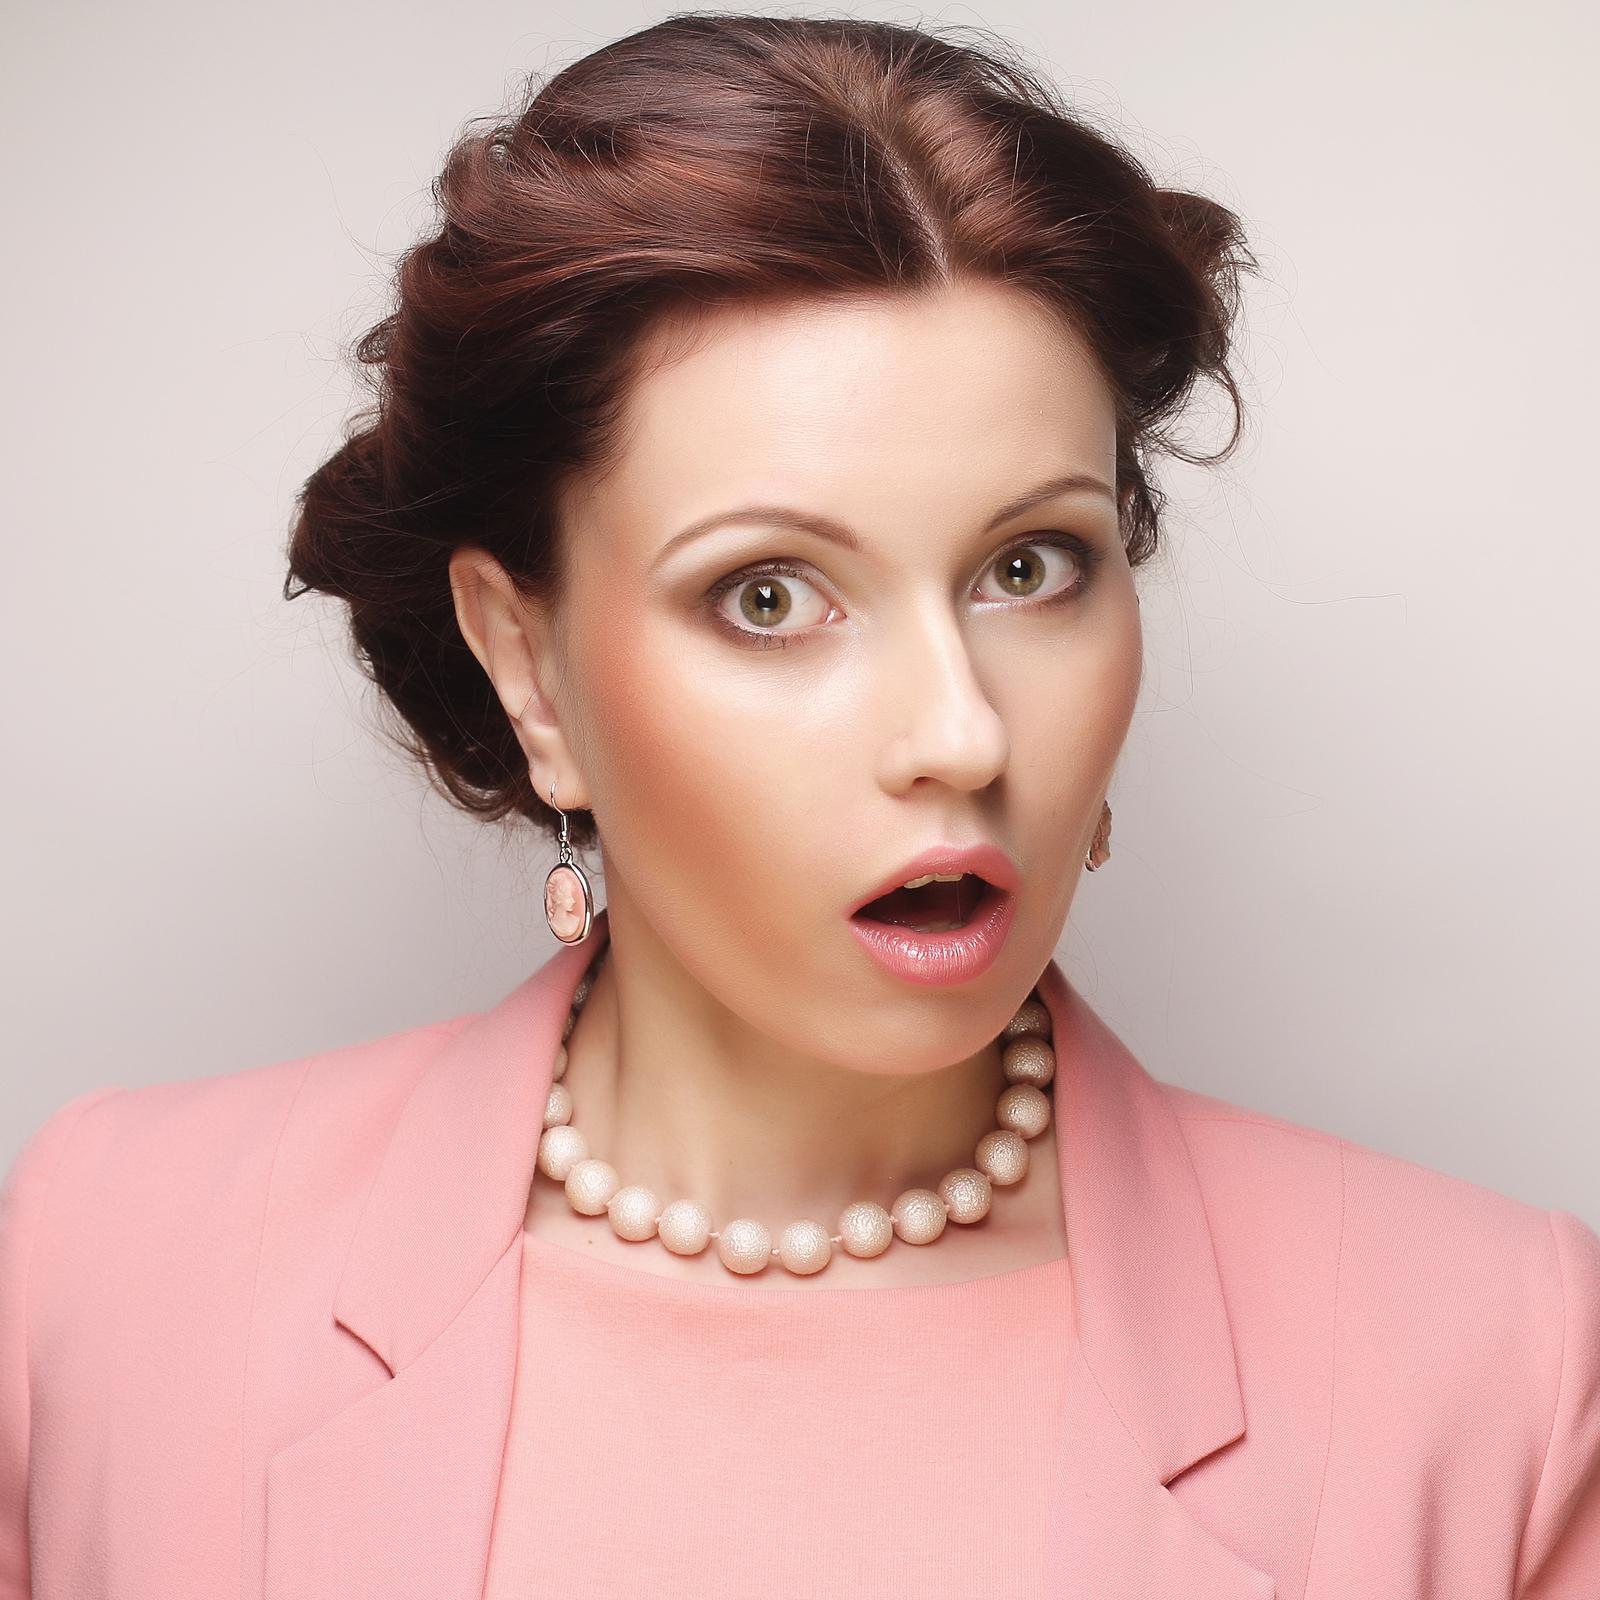

In [14]:
cv2_imshow(img)

In [17]:
result=labels_df[labels_df["image_name"] == "surprised_expression_86.jpg" ]

In [18]:
result

image_name  face_id_in_image  face_box_top  \
91772  surprised_expression_86.jpg                 0           256   

       face_box_left  face_box_right  face_box_bottom  face_box_cofidence  \
91772            512            1280             1024              111.71   

       expression_label  
91772                 5

In [38]:
result.to_numpy()[0][6]

111.71

In [20]:
top = result.to_numpy()[0][2]
left = result.to_numpy()[0][3]
right = result.to_numpy()[0][4]
bottom = result.to_numpy()[0][5]
print(top,left,right,bottom)

256 512 1280 1024


In [22]:
crop_img = img[top:bottom,left:right]

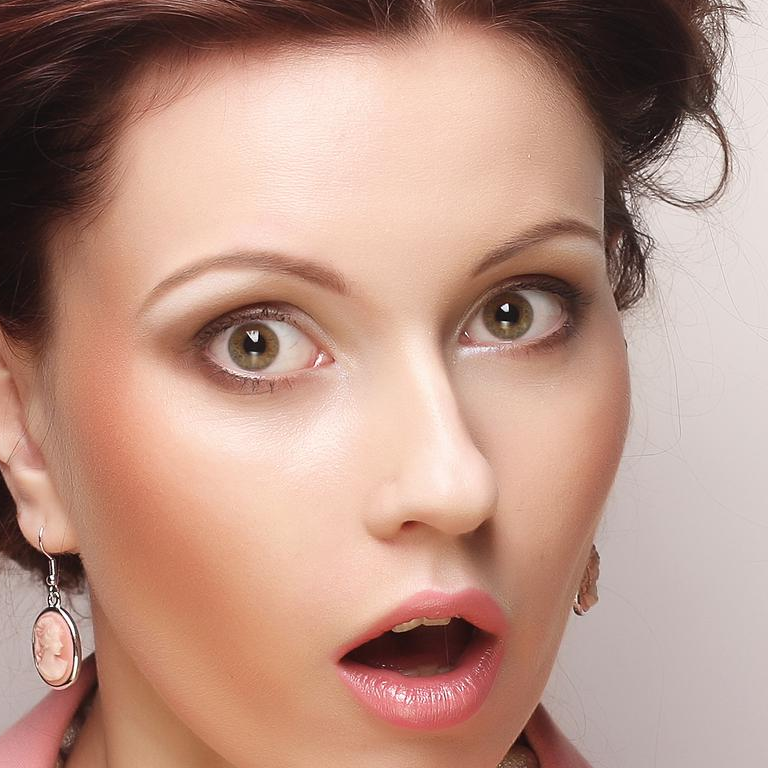

In [23]:
cv2_imshow(crop_img)

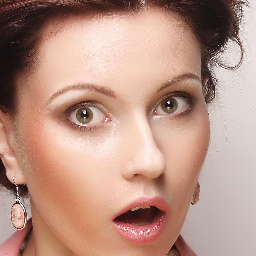

In [25]:
cv2_imshow(cv2.resize(crop_img,(256,256)))

In [5]:
pre_p_dir = "/content/drive/MyDrive/Data Sets/Final Data"
dest_train = "/content/drive/MyDrive/Data Sets/Final Data/train"
dest_valid = "/content/drive/MyDrive/Data Sets/Final Data/validation"
destination_labels = ["angry","disgust","fear","happy","sad","surprise","neutral"]
# os.makedirs(dest_train)
# os.makedirs(dest_valid)

In [33]:
split_ratio = 0.3
num_images = len(os.listdir(images))
validation_num = int(num_images * split_ratio)
train_num = num_images - validation_num

In [42]:
for i in destination_labels:
  os.makedirs(os.path.join(pre_p_dir,dest_train,i))
for i in destination_labels:
  os.makedirs(os.path.join(pre_p_dir,dest_valid,i))

In [44]:
images_names = os.listdir(images)

In [47]:
type(images_names)

list

In [50]:
counter = 0
loop_counter = 0
for i in range(len(os.listdir(images))):
    result=labels_df[labels_df["image_name"] == images_names[i] ]
    try:
      image_name = result.to_numpy()[0][0]
      top = result.to_numpy()[0][2]
      left = result.to_numpy()[0][3]
      right = result.to_numpy()[0][4]
      bottom = result.to_numpy()[0][5]
      image_label = int(result.to_numpy()[0][7])
      face_confidance = int(result.to_numpy()[0][6])
    except IndexError:
      continue
    print(image_name,top,left,right,bottom,image_label,face_confidance)
    if i <= validation_num:
      if face_confidance > 40:
          print("image Avalable in images")
          img = cv2.imread(os.path.join(images,image_name))
          crp_img = img[top:bottom,left:right]
          resized_img =  cv2.resize(crp_img,(256,256))
          if image_label == 0:
              print("angry_class")
              img_path = os.path.join(dest_valid,"angry",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 1:
              print("disgust_class")
              img_path = os.path.join(dest_valid,"disgust",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 2:
              print("fear_class")
              img_path = os.path.join(dest_valid,"fear",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 3:
              print("happy_class")
              img_path = os.path.join(dest_valid,"happy",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 4:
              print("sad_class")
              img_path = os.path.join(dest_valid,"sad",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 5:
              print("surprice_class")
              img_path = os.path.join(dest_valid,"surprise",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 6:
              print("nutral_class")
              img_path = os.path.join(dest_valid,"neutral",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
      else:
          continue
    else:
        if face_confidance > 40:
          print("image Avalable in images")
          img = cv2.imread(os.path.join(images,image_name))
          crp_img = img[top:bottom,left:right]
          resized_img =  cv2.resize(crp_img,(256,256))
          if image_label == 0:
              print("angry_class")
              img_path = os.path.join(dest_train,"angry",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 1:
              print("disgust_class")
              img_path = os.path.join(dest_train,"disgust",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 2:
              print("fear_class")
              img_path = os.path.join(dest_train,"fear",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 3:
              print("happy_class")
              img_path = os.path.join(dest_train,"happy",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 4:
              print("sad_class")
              img_path = os.path.join(dest_train,"sad",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 5:
              print("surprice_class")
              img_path = os.path.join(dest_train,"surprise",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
          if image_label == 6:
              print("nutral_class")
              img_path = os.path.join(dest_train,"neutral",image_name)
              cv2.imwrite(img_path,resized_img)
              counter += 1
        else:
          continue

    loop_counter +=1
print("Total images Saved:",counter)

Streaming output truncated to the last 5000 lines.
image Avalable in images
happy_class
amazed_father_356.jpg 16 11 78 83 5 42
image Avalable in images
surprice_class
amazed_grandmother_577.jpg 87 311 406 182 1 73
image Avalable in images
disgust_class
amazed_grandfather_936.jpg 48 409 505 144 6 40
amazed_infant_152.jpg 54 40 202 216 5 49
image Avalable in images
surprice_class
amazed_expression_59.jpg 292 319 638 611 5 67
image Avalable in images
surprice_class
heartbroken_worker_329.jpg 4 368 416 52 1 27
amazed_face_75.jpg 80 133 453 400 5 43
image Avalable in images
surprice_class
unhappy_expression_660.jpg 76 400 457 133 6 24
heartbroken_yang_522.jpg 512 521 577 568 1 10
amazed_boss_96.jpg 192 384 576 384 2 64
image Avalable in images
fear_class
amazed_boss_263.jpg 90 237 372 225 6 100
image Avalable in images
nutral_class
amazed_asian_119.jpg 67 169 250 148 0 44
image Avalable in images
angry_class
expressionless_actor_20.jpg 66 160 320 226 2 75
image Avalable in images
fear_class

In [51]:
from tensorflow.keras.utils import image_dataset_from_directory

In [52]:
image_dataset_from_directory(dest_valid)

Found 933 files belonging to 7 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
image_dataset_from_directory(dest_train)

Found 2087 files belonging to 7 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential, Model
from keras.layers import Flatten , Dense, Dropout, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [63]:
train_set = train_datagen.flow_from_directory(dest_train,
                                              target_size=(256, 256),
                                              batch_size=32,
                                              class_mode='categorical')
valid_set = valid_datagen.flow_from_directory(dest_valid,
                                              target_size=(256, 256),
                                              batch_size=32,
                                              class_mode='categorical')

Found 2087 images belonging to 7 classes.
Found 933 images belonging to 7 classes.


In [7]:
base_model = keras.applications.VGG16(
    weights="imagenet",
    input_shape=(256, 256, 3),
    include_top=False
)

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [9]:
base_model.trainable = False

In [25]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

In [26]:
my_model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
my_model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",
                 metrics=["accuracy"])

In [28]:
my_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [29]:
my_model.fit(train_set, validation_data=valid_set, epochs=30)

Epoch 1/30
66/66 [==============================] - 1023s 16s/step - loss: 1.5179 - accuracy: 0.3924 - val_loss: 2.1548 - val_accuracy: 0.1436
Epoch 2/30
66/66 [==============================] - 43s 658ms/step - loss: 1.4274 - accuracy: 0.4394 - val_loss: 1.9183 - val_accuracy: 0.3398
Epoch 3/30
66/66 [==============================] - 42s 637ms/step - loss: 1.3901 - accuracy: 0.4562 - val_loss: 1.8601 - val_accuracy: 0.3976
Epoch 4/30
66/66 [==============================] - 42s 634ms/step - loss: 1.3788 - accuracy: 0.4648 - val_loss: 1.8716 - val_accuracy: 0.3398
Epoch 5/30
66/66 [==============================] - 42s 637ms/step - loss: 1.3548 - accuracy: 0.4753 - val_loss: 2.0005 - val_accuracy: 0.3569
Epoch 6/30
66/66 [==============================] - 42s 639ms/step - loss: 1.3382 - accuracy: 0.4863 - val_loss: 1.9688 - val_accuracy: 0.2594
Epoch 7/30
66/66 [==============================] - 43s 658ms/step - loss: 1.3296 - accuracy: 0.4839 - val_loss: 1.8116 - val_accuracy: 0.3816

In [58]:
model_2 = Sequential()
model_2.add(Conv2D(64,(3,3), 1 , activation = "relu" , input_shape = (256,256,3)))
model_2.add(MaxPooling2D())
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))

model_2.add(Conv2D(32,(3,3),1,activation = "relu"))
model_2.add(MaxPooling2D())
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))

model_2.add(Conv2D(16,(3,3),1,activation = "relu"))
model_2.add(MaxPooling2D())
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))

model_2.add(Conv2D(16,(3,3),1,activation = "relu"))
model_2.add(MaxPooling2D())
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))

model_2.add(Flatten())

model_2.add(Dense(256,activation = "relu"))
model_2.add(Dropout(0.25))
model_2.add(Dense(7,activation = "softmax"))



In [65]:
model_2.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [66]:
model_2.fit(train_set , validation_data= valid_set , epochs = 30)

Epoch 1/30
66/66 [==============================] - 53s 683ms/step - loss: 2.4228 - accuracy: 0.3000 - val_loss: 2.0767 - val_accuracy: 0.1297
Epoch 2/30
66/66 [==============================] - 42s 629ms/step - loss: 1.9944 - accuracy: 0.3292 - val_loss: 2.2320 - val_accuracy: 0.3901
Epoch 3/30
66/66 [==============================] - 42s 630ms/step - loss: 1.7702 - accuracy: 0.3474 - val_loss: 3.1234 - val_accuracy: 0.1297
Epoch 4/30
66/66 [==============================] - 44s 655ms/step - loss: 1.6731 - accuracy: 0.3666 - val_loss: 2.6119 - val_accuracy: 0.3248
Epoch 5/30
66/66 [==============================] - 41s 622ms/step - loss: 1.6735 - accuracy: 0.3598 - val_loss: 3.0366 - val_accuracy: 0.2583
Epoch 6/30
66/66 [==============================] - 41s 613ms/step - loss: 1.5962 - accuracy: 0.3800 - val_loss: 2.3014 - val_accuracy: 0.3483
Epoch 7/30
66/66 [==============================] - 41s 618ms/step - loss: 1.5799 - accuracy: 0.3805 - val_loss: 2.5324 - val_accuracy: 0.2111